# Unsupervised Learning Project

#### Overview:
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.


#### Objective:
The objective is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.



<!-- ![alt text](vehicle1.jpg) -->

### Silhouette of vehicles

<img src = "vehicle1.jpg" style = "width:600px"/>

## 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)

In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

import warnings # to ignore warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC      
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### || Importing the dataset to Data Frame ||

In [2]:
df = pd.read_csv('vehicle.csv')

df.head(10)  # High level observation of dataset

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [3]:
print("The dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]),'\n\n')

df.info()

The dataframe has 846 rows and 19 columns 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 

### There are 846 rows with 19 columns.
### The categorical column 'class' represents the category of vehicles.

In [4]:
df.isnull().sum() # Null value check

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### From above we can see that few null values are there in the columns of the dataset. 
### So we have two options either we will drop those null values or we will impute those null values. Dropping null values is not a good way because we will lose some information. Hence going forward we will impute those null values with the median value of the respective columns

In [5]:
# Five point summary of the numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


car    429
bus    218
van    199
Name: class, dtype: int64 



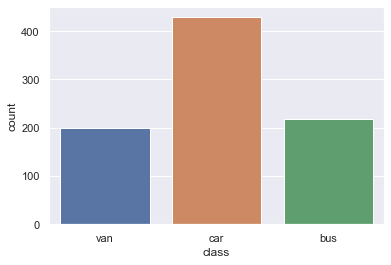

In [6]:
# Distribution of target column
print(df['class'].value_counts(),'\n')
sns.countplot(df['class']);

### From above we can see that cars are most followed by bus and then vans.
### The data is not distributed equally for the 3 vehicle classes. The 50% of the data belongs to car class.
### radius_ratio, axis_aspect_ration, length_aspect_ratio & scaled_radius_of_gyration.1 columns have very long right tail, all the columns mean is greater than the median
### The scale of the columns are very different so would need normalization.

### || Data Pre-processing ||

In [7]:
#instead of dropping the rows, lets replace the missing values with median value. 
df.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [8]:
# replace the missing values with median value.
# we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively
df = df.fillna(df.median())    # The fillna() function is used to fill NaN values using the specified method

In [9]:
df.isna().apply(pd.value_counts)   # checking null values now

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
False,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846


In [10]:
### Null values are treated

In [11]:
df.duplicated().sum()  # no duplicate values found in the dataset

0

In [12]:
# Optional, we can implement without replacing the classes with numerical values also
replace_dependent= {'class' : {'car': 0, 'bus': 1, 'van': 2} }

df = df.replace(replace_dependent)
df['class'].value_counts()

0    429
1    218
2    199
Name: class, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

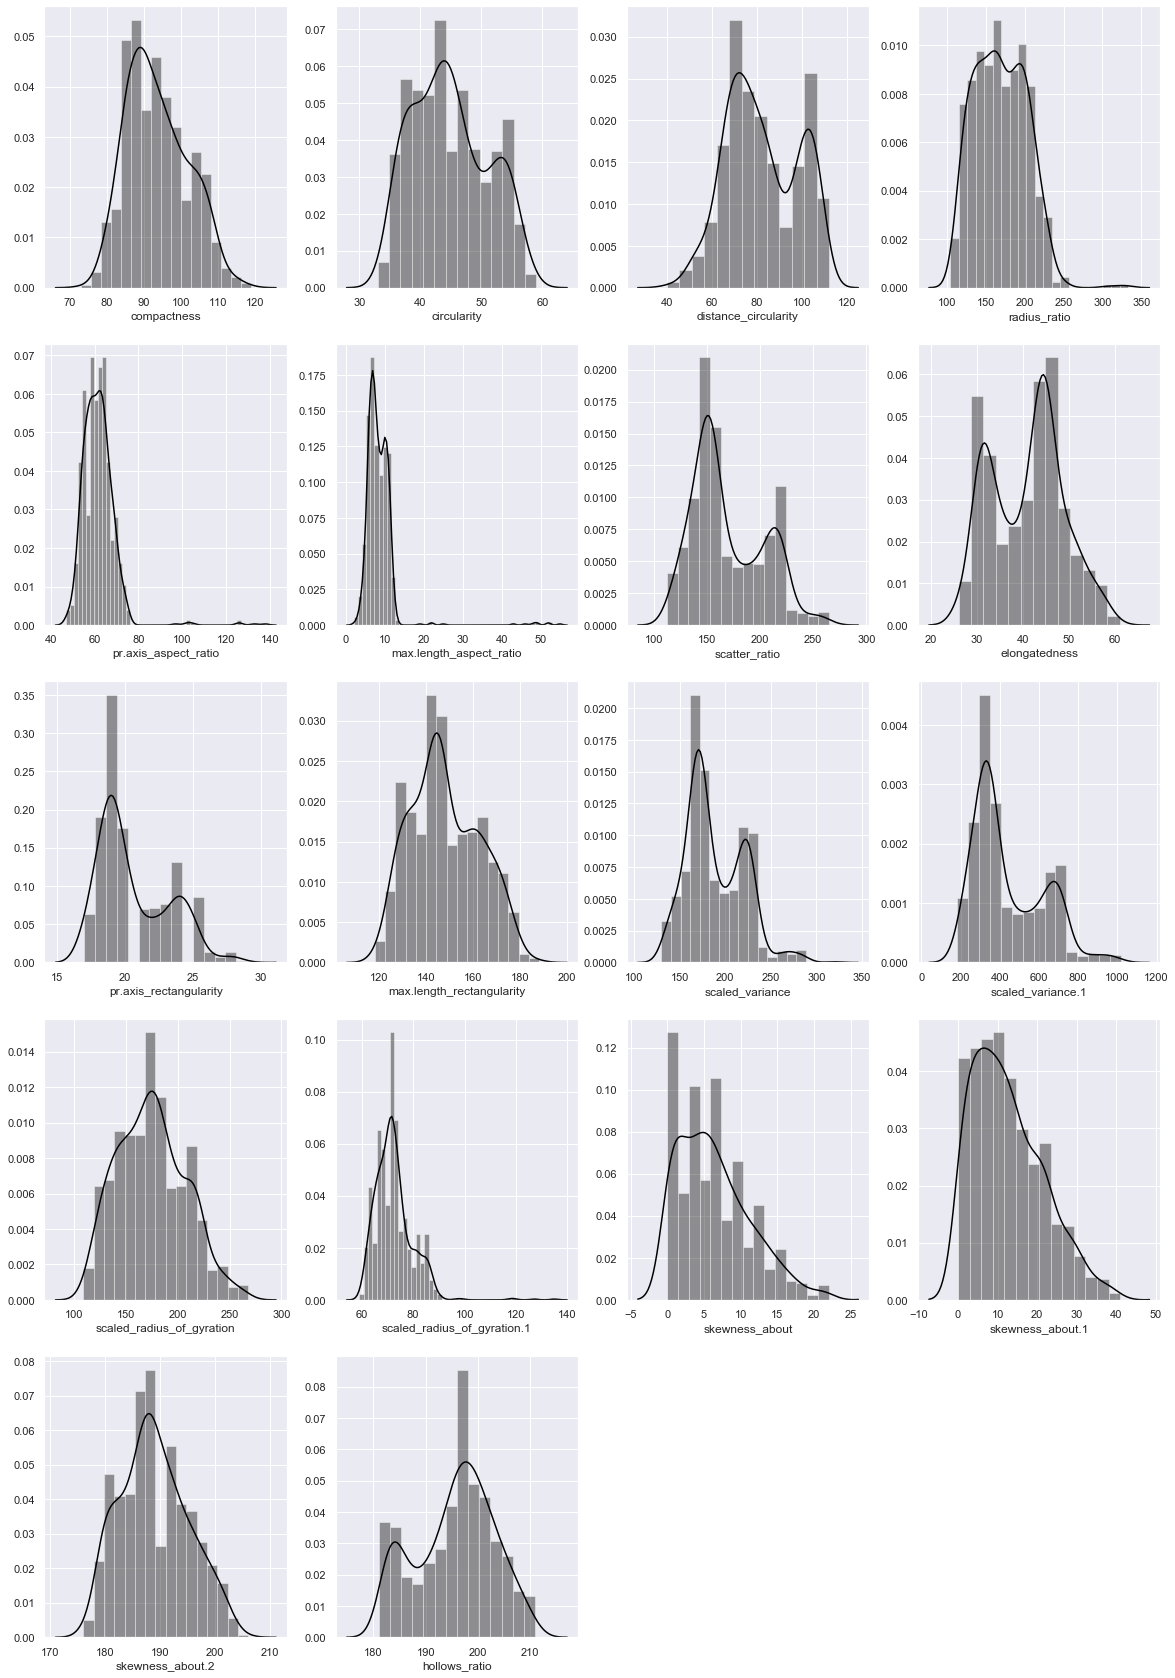

In [14]:
k=1
plt.figure(figsize=(20,30))

# using for loop to iterate over all the columns in the dataframe and plot the histogram of those 

for col in df.columns[0:18]: # iterating columns except dependent column
    plt.subplot(5,4,k)
    sns.distplot(df[col],color='black')
    k=k+1

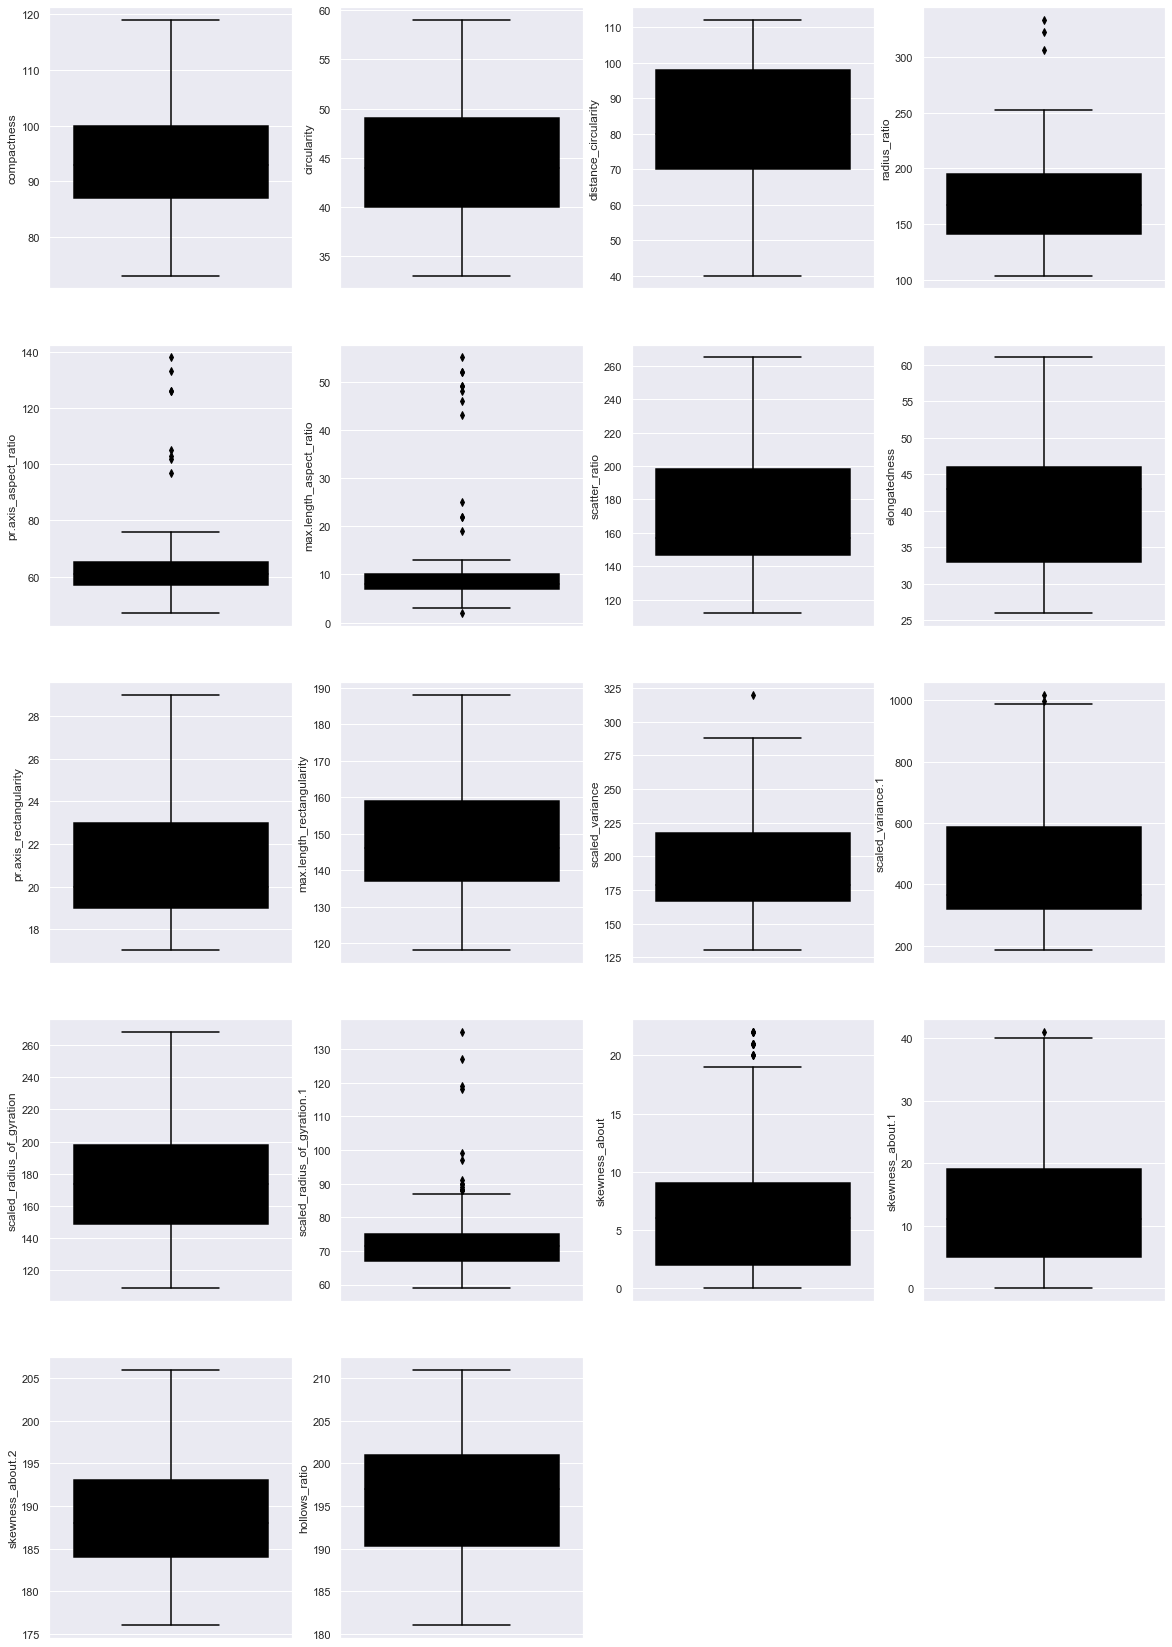

In [15]:
k=1
plt.figure(figsize=(20,30))

# using for loop to iterate over all the columns in the dataframe and plot the boxplot of those 
# as we can observe outliers easily in boxplot

for col in df.columns[0:18]: # iterating columns except dependent column
    plt.subplot(5,4,k)
    sns.boxplot(y=df[col],color='black')
    k=k+1

### As we can see few columns are having outliers 
### * There are no outliers in compactness and circularity columns and they looks like normally distributed.
### * There are no outliers in the distance_circularity column but we can see that there is right skewness as the tail is towards the right side(mean>median)
### * we can see that there are outliers in radius_ratio and max_length_aspect_ratio columns and there is positive skewness because the long tail is on the right side(mean>median)
### * We can analyze that in the columns scaled_cariance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about and skewness_about.1 are having outliers and right skewed
### * Columns except previous point even though seems not having outliers but they are highly skewed to the right, there are more than one peaks in the distribution


### After seeing that there are outliers present in the columns, i assume that the presence of outliers in these columns are natural.
### As we know that models are affected by outliers, we can treat the outliers with some metric, we will see down th line


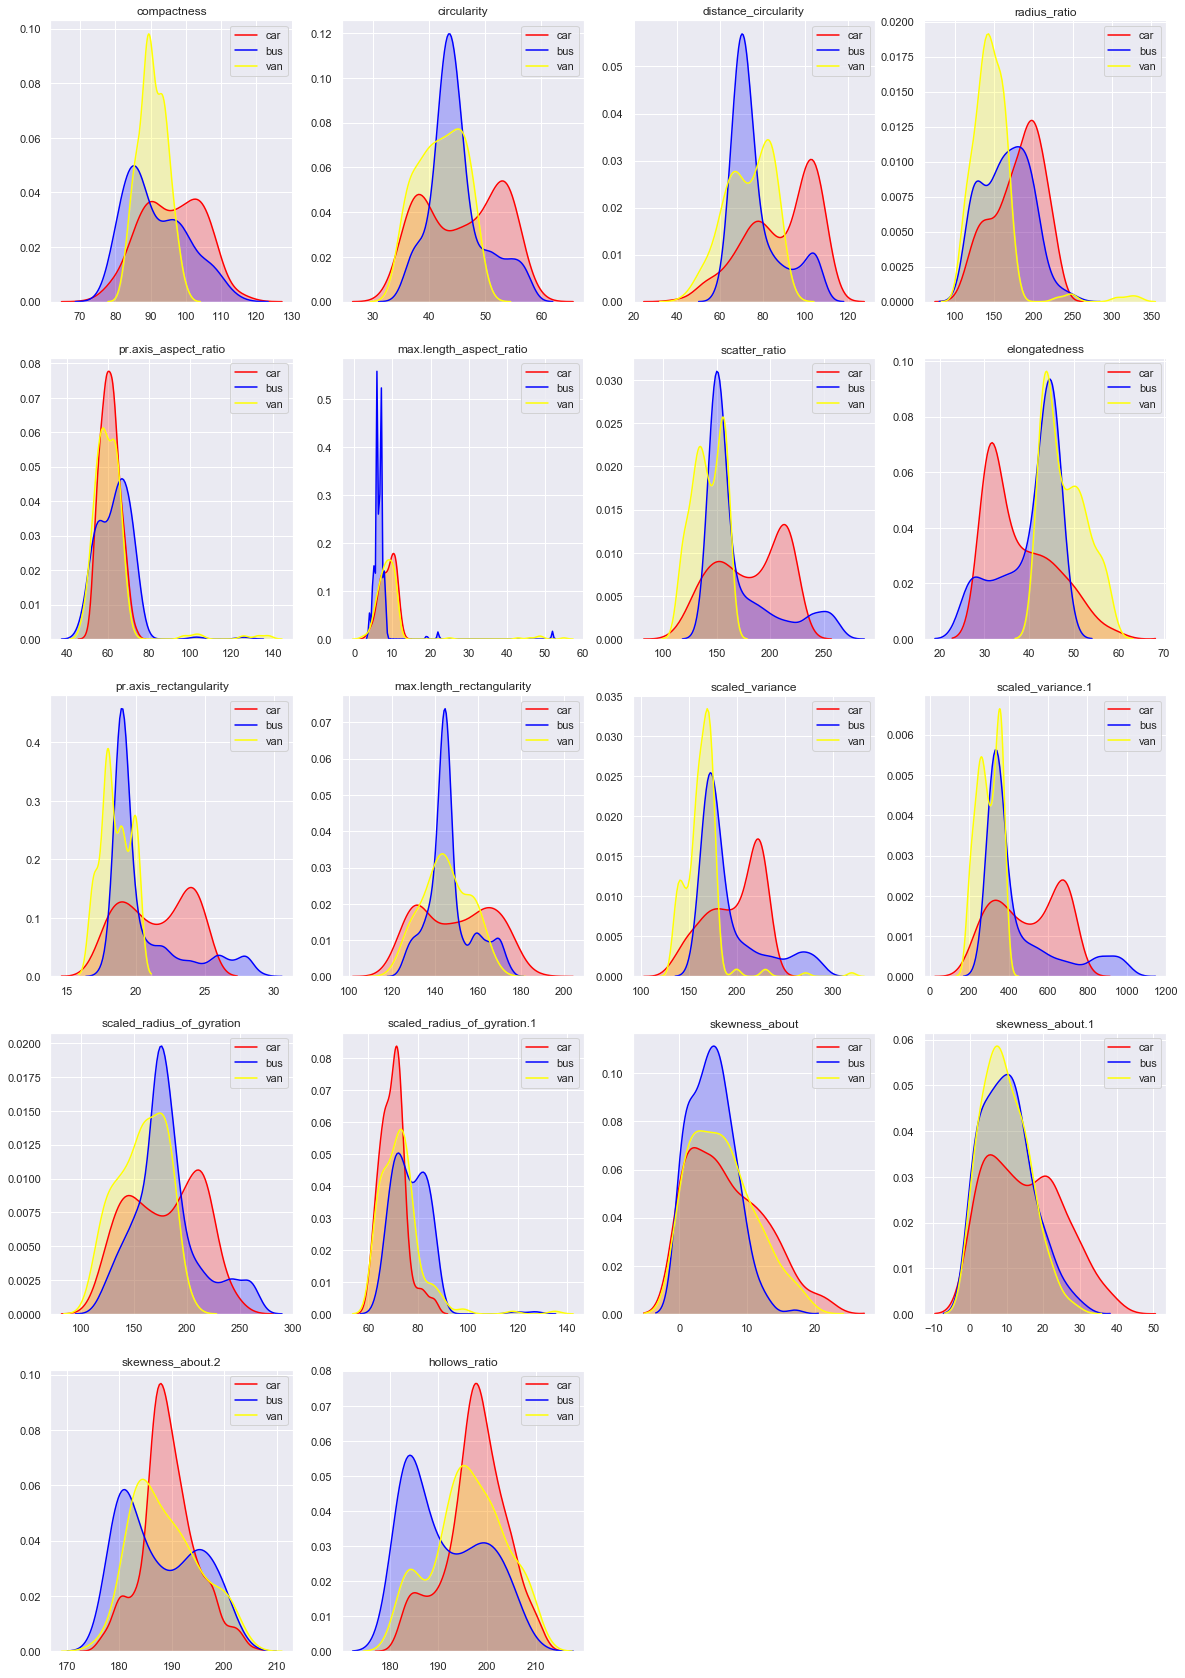

In [16]:
# kde plots to show the distribution of the all the variables with respect to dependent variable
k=1
plt.figure(figsize=(20,30))
for col in df.columns[0:18]:
    plt.subplot(5,4,k)
    sns.kdeplot(df[df['class']==0][col],color='red',label='car',shade=True)
    sns.kdeplot(df[df['class']==1][col],color='blue',label='bus',shade=True)
    sns.kdeplot(df[df['class']==2][col],color='yellow',label='van',shade=True)
    plt.title(col)
    k=k+1

###  **Observations** :
### Spread of compactness is least for van. mean compactness is highest for car. For Bus compactness is right skewed indicating that less number of buses have high compactness.
### Mean circularity is higher for cars
### Mean distance_circularity is also higher for cars
### pr.axis_aspect_ratio is has almost same distribution for car, van and buses
### 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', have almost similar distribution for cars, buses and vans.


In [17]:
# sns.pairplot(df,diag_kind='kde')

### From above pair plots we can see that many columns are correlated among them, this leads to multi-collinearity and many columns have long tail so that is the indication of outliers.we will see down the line with the help of correlation matrix what's the strength of correlation using heatmap

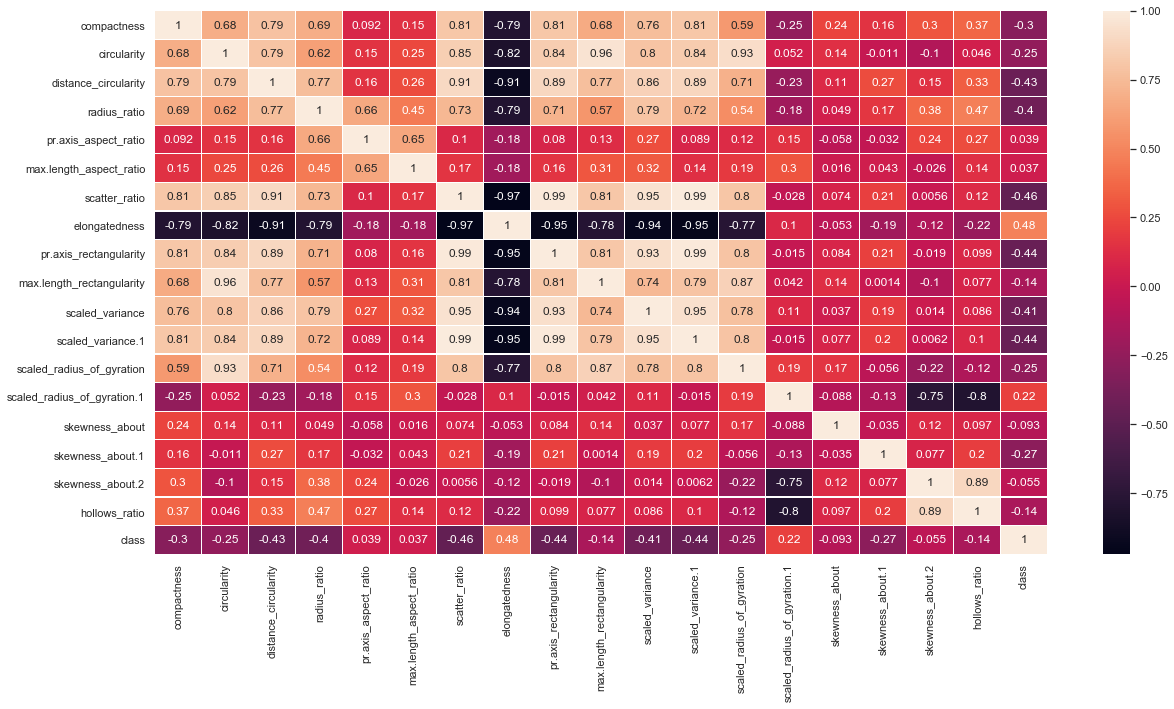

In [18]:
fig= plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True, linewidth = 0.2)

### From above correlation matrix we can see that there are many features which are highly correlated. if we see carefully then Scatter ratio & Scaled_variance1 has almost perfect positive linear relationship and many other features also there which having more than 0.9(positive and negative) correlation and it is difficult to determine which dimensions to drop manually.

### So our objective is to recognize whether an object is a van or bus or car based on some input features. so our main assumption is there is little or no multicollinearity between the features. All the features should be independent with one another, if two features is highly correlated then there is no use in using both features.

###  As we have seen in the distribution plots, we have outliers in some columns and we can remove those outliers or we will apply pca and let pca to be decided how it will explain above data which is in high dimension with smaller number of variables and luckily it removes multicollinearity as well.

### We can drop the variables which are highly correlated with each other by setting threshold and also hypothesis test can be implemented on all these variables by checking p-value of those and variables can be removed which are having p-value more than 0.05

### Since we are going to implement PCA technique, it will take care multicollinearity and gives us the the variables which are independent to each other

In [19]:
correlation_values=df.corr()['class']
pd.DataFrame(correlation_values.sort_values(ascending=False))

,class
class,1.000000
elongatedness,0.483027
scaled_radius_of_gyration.1,0.221288
pr.axis_aspect_ratio,0.038686
max.length_aspect_ratio,0.036942
skewness_about.2,-0.054732
skewness_about,-0.092882
max.length_rectangularity,-0.140152
hollows_ratio,-0.142852
scaled_radius_of_gyration,-0.247735


### With above correlation dataframe we can observe that only top 4 columns has positive correlation with the target variable and rest are having negative correlation,

#

## 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

In [20]:
x = df.iloc[:,0:18]  # independent variables
y = df['class']      # target variable

# Scaling the data using zscore technique as the predictor values has different scale
from scipy.stats import zscore
XScaled=x.apply(zscore)
XScaled.head()

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(XScaled, y, test_size=0.2, random_state = 56)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(676, 18)
(676,)
(170, 18)
(170,)


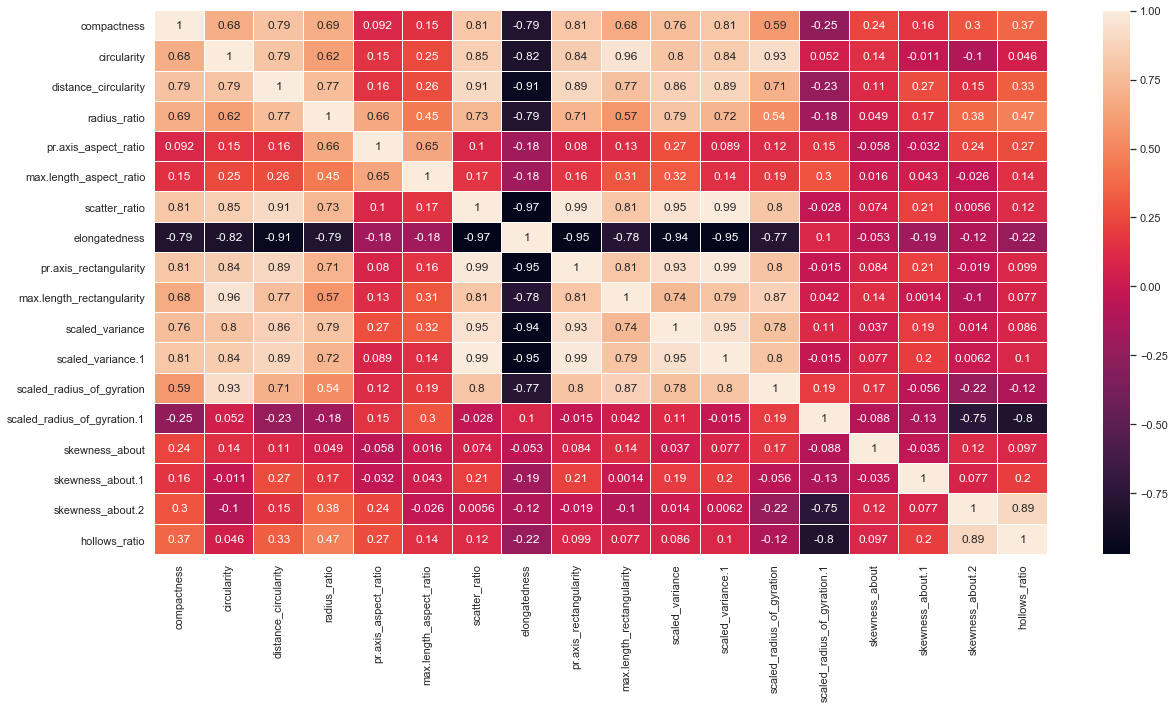

In [28]:
fig= plt.subplots(figsize=(20, 10))
sns.heatmap(XScaled.corr(),annot=True, linewidth = 0.2)

## 4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)

In [21]:
# instantiating the model
svm_model = SVC()

# fitting the model
svm_model.fit(x_train, y_train)

# score on unseen data
accuracy = svm_model.score(x_test,y_test)
print(accuracy*100)

95.29411764705881


In [22]:
scores_df = pd.DataFrame({ 'Model' : 'SVM',  'Accuracy' : [accuracy*100] })
scores_df

,Model,Accuracy
0,SVM,95.294118


In [23]:
# prediction using test data
y_pred = svm_model.predict(x_test)

# generating classification report of actual and predicted values
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        93
           1       0.98      0.94      0.96        49
           2       0.87      0.96      0.92        28

    accuracy                           0.95       170
   macro avg       0.94      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



In [24]:
# confusion matrix of actual and predicted values
metrics.confusion_matrix(y_test,y_pred)

array([[89,  1,  3],
       [ 2, 46,  1],
       [ 1,  0, 27]], dtype=int64)

## 5. Perform K-fold cross validation and get the cross validation score of the model (optional)

In [25]:
# number of splits (25)
num_folds = 2

# initialising kfold object
kfold = KFold(n_splits = num_folds, random_state = 56)

# specifying the model to perform cross validation
model = SVC()

from sklearn.model_selection import cross_val_predict


# noting accuracy scores of all the 25 split runs
for i in [num_folds]:
#     scores = cross_val_score(model, XScaled, y, cv = kfold)
    y_pred = cross_val_predict(model, XScaled, y, cv=kfold)
#     y_pred = model.predict(y_test)
    print(y_pred)
    print(metrics.confusion_matrix(y,y_pred))
    print(metrics.classification_report(y,y_pred))

# printing all the 25 scores
# print(scores)
# print('')

# # here we are getting average accuracy with standard deviation for range estimate
# print('Overall Accuracy : {:.2f}% ({:.2f}%)'.format(scores.mean()*100.0, scores.std()*100.0))

[2 2 0 2 2 1 0 2 2 0 2 0 1 2 1 0 2 1 0 0 1 2 1 2 0 2 0 0 1 0 2 2 0 0 0 2 1
 0 0 1 0 2 2 0 0 2 2 1 2 0 0 0 0 1 1 2 0 2 0 2 0 0 2 1 1 0 1 0 2 1 0 0 0 0
 2 0 0 0 1 1 1 1 2 0 1 1 2 2 1 0 0 0 0 2 1 0 0 1 0 1 2 2 2 2 1 0 0 0 1 1 2
 2 0 2 2 2 0 0 1 1 0 2 2 0 2 2 1 2 2 1 0 0 0 2 0 2 2 2 0 2 0 1 0 1 0 0 2 1
 0 2 0 1 0 0 2 1 0 2 0 0 0 0 0 2 0 0 0 0 1 2 0 1 2 1 2 1 0 2 1 2 0 0 1 0 0
 1 1 0 0 0 0 2 0 1 0 1 0 1 1 1 2 0 0 0 2 2 0 1 1 0 0 2 1 1 0 0 1 0 1 2 0 2
 1 1 0 2 0 2 0 1 2 2 1 0 2 2 1 1 0 1 0 0 1 0 2 2 1 0 0 0 2 0 2 1 2 0 0 0 0
 0 0 0 2 2 0 1 1 0 2 2 1 0 2 2 1 1 1 0 0 1 0 1 1 0 2 0 1 2 0 0 2 2 1 2 1 0
 1 0 0 1 0 0 1 2 1 1 0 0 0 0 0 2 0 0 1 2 2 0 2 1 0 1 1 0 0 1 0 0 2 0 2 0 0
 1 1 0 2 1 2 1 1 0 0 0 0 1 0 0 2 2 0 0 2 1 0 0 1 0 0 0 0 0 0 2 0 0 2 0 1 0
 1 1 2 1 2 1 0 0 0 0 0 1 1 0 2 2 0 2 0 0 1 2 2 1 0 0 1 1 1 2 0 0 0 2 0 1 0
 0 1 0 0 0 1 0 2 0 2 1 1 0 2 0 2 1 0 0 0 0 0 2 0 1 0 1 0 2 2 0 0 0 0 2 2 0
 1 2 0 0 1 2 1 0 0 1 0 1 2 1 0 0 2 0 0 0 1 1 1 0 0 2 2 0 1 0 0 0 0 2 1 1 0
 0 0 0 2 1 0 0 0 0 0 0 1 

### Here we are getting higher accuracy. By seeing average of all the 25 cross validation scores we can say that our model would perform betweeen 91% and 100% of accuracy with 95% of the confidence interval

In [26]:
scores_df1 = pd.DataFrame({'Model': ['SVM(cross_val)'], 'Accuracy' : [scores.mean()*100]})
scores_df = pd.concat([scores_df,scores_df1]).drop_duplicates()
scores_df

NameError: name 'scores' is not defined

## 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

#### Principal Component Analysis is an unsupervised machine learning technique which finds insights of data without having prior knowledge. It reduces data by projecting onto lower dimensional basis know as principal components
#### It uses the matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions
#### Main idea of using PCA is to seek most accurate data representation in lower dimension space and it removes the noise and explore the hidden pattern within the data

#### Below we will implement the PCA with step by step

### Step 1. Normalize / Scale the data  
--- As the data is already scaled using z-score when splitting the data into independent and dependent columns hence, we are not going to perform scaling here

### Step 2. Second step is to Generate the covariance matrix / correlation matrix for all the dimensions

In [ ]:
covMatrix = np.cov(XScaled,rowvar=False)
pd.DataFrame(covMatrix)

In [ ]:
 # Covariance is the direction of the linear relationship between variables.

### Step 3. Perform eigen decomposition, that is, compute eigen vectors which are the principal components and the corresponding eigen values which are the magnitudes of variance captured

#### Here we will generate the eigen values and their corresponding eigen vectors.
#### The eigenvectors are nothing but the principal components of our above covariance matrix and represent the axis of new feature space whereas eigenvalues are the magnitude of those vectors

In [ ]:
pca = PCA()
pca.fit(XScaled)

In [ ]:
# Eignen values
pca.explained_variance_

In [ ]:
# Eigen Vectors
pd.DataFrame(pca.components_)

### Here in the below code printing the percentage of variance explained by each principle component from 1 to 18 (as there are 18 independent columns in our dataset)


In [ ]:
k = 1
total = []
for i in pca.explained_variance_ratio_*100:
    print('Variance explained by Principle Component',k,'is : {:.2f}%'.format(i))
    k+=1
    total.append(i)
print('\nTotal variance explained by all the principle components:',sum(total),'%')

### Here we can notice that the First principal component is a linear combination of original predictor variables which captures the maximum variance i.e. 52% in the data set followed by two,three and so on... It determines the direction of highest variability in the data.

### Will visualize the plot of above principle components

In [ ]:
# Implementing scree plot 
plt.figure(figsize=(16 , 5))
plt.bar(range(1, 19), pca.explained_variance_ratio_, label = 'Individual explained variance',color='lightblue',edgecolor='black')
plt.step(range(1, 19), np.cumsum(pca.explained_variance_ratio_),where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.show()

### Visually we can observe that there is a steep drop in variance explained with increase in number of PC's.
### We will proceed with 7 components here as it explains 95% of the variance
### With only 7 variables/PC's we can explain over 95% of the variation in the original data!

In [ ]:
# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 18 to 7)

pca2 = PCA(n_components=7)  # here you can notice we are specifying 7 PC components in the parameter called n_components
pca2.fit(XScaled)

In [ ]:
# Eigen Vectors (transformed into 7 dimensions)
pd.DataFrame(pca2.components_).T

In [ ]:
# Eigen Values (only 7)
pca2.explained_variance_

In [ ]:
# Percentage of variance explained by 7 PC components
sum(pca2.explained_variance_ratio_*100)

In [ ]:
# Now Implementing scree plot on 8 variables
plt.figure(figsize=(16 , 5))  # size of the plot

# bar plot
plt.bar(range(1, 8), pca2.explained_variance_ratio_, label = 'Individual explained variance',color='lightblue',edgecolor='black')

# step plot on bars which is a cummulative sum of the variance explained by 7 pc components
plt.step(range(1, 8), np.cumsum(pca2.explained_variance_ratio_),where='mid', label = 'Cumulative explained variance',color = 'black')

plt.ylabel('Explained Variance Ratio')  # x axis label
plt.xlabel('Principal Components')      # y axis label
plt.legend()

In [ ]:
# #transforming the impute raw data which is in 18 dimension into 7 new dimension with pca
pca_transformed =  pca2.transform(XScaled)

In [ ]:
# checking the shape of pca_transformed data
pca_transformed.shape

In [ ]:
# Visualising PCA dimensions with pair panel
sns.pairplot(pd.DataFrame(pca_transformed),diag_kind = 'kde')

###  Above pairplot clearly shows there is no Collinearity between the variables, hence correlation is close to zero. So we could able to decrease the correlation between independent variables

### Going forward only with 7 columns we will be able to build the model which should give almost same accuracy as the model with 18 dimensions, will see below

In [ ]:
# will see the shape of original train and test dataset

print('original data shape')
print('shape of x_train',x_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_test',y_test.shape)


## 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)

In [ ]:
# split the transformed pca data
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(pca_transformed, y, test_size = 0.2, random_state = 56)


# Shape of new train and test data
print('*** Transformed data using pca ***')
print('   shape of pca_x_train:',pca_x_train.shape)
print('   shape of pca_y_train:',pca_y_train.shape)
print('   shape of pca_x_test:',pca_x_test.shape)
print('   shape of pca_y_test:',pca_y_test.shape)


### We can observe that dimensions are reduced to 7, this is called the dimensionality reduction technique. Now we will build the SVM model again and predict the score and also will compare with original data

In [ ]:
# creating a dataframe with the new dataset
### pca_transformed is the new dataset with 7 principle components
pca_transformed = pd.DataFrame(pca_transformed,columns = df.columns[0:7])

# shape of the dataframe
print(pca_transformed.shape)  

# displaying head of the dataframe
pca_transformed.head(10)

### This is our new transformed data using PCA including 7 columns and 846 data points

### We will build the classification model again with this new data

In [ ]:
# instanstiating the object of SVM model / building the svm model using principle components instead of original data
svm_pca = SVC()

# fitting the model on new data
svm_pca.fit(pca_x_train, pca_y_train)

In [ ]:
# score of test data
print('Accuracy score of SVM model after reducing dimensions :',svm_pca.score(pca_x_test,pca_y_test),'\n\n')

# prediction using pca test data
svm_pca_pred = svm_pca.predict(pca_x_test)

# generating classification report of actual and predicted values
print(metrics.classification_report(pca_y_test, svm_pca_pred))

# confusion matrix of actual and predicted values
print('\n Confusion matrix:\n',metrics.confusion_matrix(pca_y_test, svm_pca_pred))

In [ ]:
scores_df1 = pd.DataFrame({'Model': ['SVM with PCA'], 'Accuracy' : [svm_pca.score(pca_x_test,pca_y_test)*100]})
scores_df = pd.concat([scores_df,scores_df1]).drop_duplicates()
scores_df

### We can see that getting better accuracy even with the 7 variables/principle components. it's close to the accuracy which we got with raw data

In [ ]:
# number of splits
num_folds = 25

# initialising kfold object
kfold = KFold(n_splits = num_folds, random_state = 56)

# specifying the model to perform cross validation
model = SVC()

# noting accuracy scores of all the 25 split runs
scores = cross_val_score(model, pca_transformed, y, cv = kfold)

# printing all the 25 scores
print(scores)
print('')

# here we are getting average accuracy with standard deviation for range estimate
print('Overall Accuracy : {:.2f}% ({:.2f}%)'.format(scores.mean()*100.0, scores.std()*100.0))

### By seeing average of all the 25 cross validation scores we can say that our model would perform betweeen 84% and 100% of accuracy with 95%(two std) of confidence interval

In [ ]:
scores_df1 = pd.DataFrame({'Model': ['SVM(cross_val) with PCA'], 'Accuracy' : [scores.mean()*100]})
scores_df = pd.concat([scores_df,scores_df1]).drop_duplicates()
scores_df

### Insights drawn :-

### Here, we have tried to study the data pattern and correlation among all the features with the help of various kind of plots like univariate, bivariate and multivariate plots. To check the skewness and spread of the data points for each features. From boxplots, presence of outliers were witnessed and to nullify the effect of outliers scaling has been done with the help of Z-score. To check the correlation between the feature columns pair plot, correlation matrix and correlation heat map also been drawn. Those above three plots/matrix clearly indicated a strong correlation or the multicollinearity between many features.

### To calculate classification results SVM model has been implemented and other technique which is part of feature enginering such as KFold cross validation.

### And our Big boy in part of this project, PCA has been implemented where we have extracted features by reducing dimensions from 18 to 7

### By reducing the dimension of  feature space, we have fewer relationships between variables to consider and are less likely to overfit our model and as an added benefit, each of the “new” variables after PCA are all independent of one another, we saw this in pairplot of transformed variables with PCA

### The classification results were computed for respective models created with some metrics such as accuracy scores, confusion matrix with respect to actual vs predicted and classification report of actual vs prdicted results



__________________________________________________________________________________________________________________________

## 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

In [ ]:
scores_df

### Above dataframe is the accuracy scores on test set of all the techniques we have implemented so far

In [ ]:
fig = plt.figure(figsize=(9,5))
plt.title('Accuracy values for various techniques')

ax = sns.barplot(scores_df['Model'],scores_df['Accuracy'],color='lightblue');

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha = 'center', va = 'center', 
                    xytext = (0, -12), 
                    textcoords = 'offset points') # used annotation to show the percentage of accuracy

### From the above bar plot, below interpretation were drawn:

### Here we can observe PCA is doing very good job. The accuracies of all the four techniques we have implemented almost similar with above 90%. So we could able to achieve with only 7 variables 

### Accuracy with PCA is approximately 93% and with the raw data we are getting 95% of the accuracy and the cross validation seems performing well with the raw data but note that pca 93% accuracy is with only 70 dimensions where as rawdata has 18 dimensions. But every thing has two sides, disadvantage of PCA is we cannot do interpretation with the model much, it's blackbox.

### In feature extraction(PCA), we create 18 new independent variables, where each new independent variable is a linear combination of each of the 18 old independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

### We keep as many of the new independent variables as we want, but we drop the least important ones, here we reduced them to seven while still retaining the most valuable parts of all of the variables! so only we got better accuracy.

### Performance of the models can be improved by doing hyper parameters tuning using Cross validation and GridSearchCV and select the best parameters for SVM, and also we can select more number of principle components

### By implementing PCA technique we overcome the issue of model complexity with more number of variables but less interpretability
